##DONOR INDICATOR AI/ML

#Importing DataSet

In [ ]:
# Code Snippet 1
# Import required libraries
import pandas as pd
import numpy as np


In [ ]:
# Code Snippet 2
# Load dataset from URL
url = 'https://raw.githubusercontent.com/Imjuandiaz/Red-Cross-Donor-Indicator-Data-Project/refs/heads/main/Data/Donor%20Dataset%20-%202023%20.csv'
df = pd.read_csv(url)
df

,DonorUniqueId,DonorPostalCode,DonorAge,MaritalStatus,GenderIdentity,IsMemberFlag,IsAlumnusFlag,IsParentFlag,HasInvolvementFlag,WealthRating,...,ConsecutiveDonorYears,LastFiscalYearDonation,Donation2FiscalYearsAgo,Donation3FiscalYearsAgo,Donation4FiscalYearsAgo,Donation5FiscalYearsAgo,CurrentFiscalYearDonation,CumulativeDonationAmount,DonorDateOfBirth,DonorIndicatorFlag.
0,1,23187.0,42,Married,Female,N,N,N,N,NaN,...,1,$0,$0,$0,$0,$0,$0,10.0,NaN,Y
1,2,77643.0,33,NaN,Female,N,Y,N,Y,NaN,...,0,$0,$0,$0,$0,$0,$0,2100.0,6/16/1985,Y
2,3,NaN,42,Married,Female,N,N,N,N,NaN,...,1,$0,$0,$0,$0,$0,$200,200.0,NaN,Y
3,4,47141.0,31,NaN,Female,N,Y,N,Y,NaN,...,0,$0,$0,$0,$0,$0,$0,0.0,12/3/1987,N
4,5,92555.0,68,NaN,Female,N,N,N,N,NaN,...,0,$0,$0,$0,$0,$0,$0,505.0,9/11/1950,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34503,34504,7848.0,42,NaN,Female,N,N,N,N,NaN,...,0,$0,$0,$0,$0,$0,$0,0.0,NaN,N
34504,34505,28275.0,24,NaN,Male,N,N,N,N,"$250,000-$499,999",...,0,$0,$0,$0,$0,$0,$0,80.0,9/23/1994,Y
34505,34506,42539.0,27,NaN,Female,N,Y,N,Y,NaN,...,0,$0,$0,$0,$0,$0,$0,0.0,1/3/1991,N
34506,34507,32733.0,46,Married,Female,N,N,N,Y,NaN,...,1,$0,$0,$0,$120,$0,$0,120.0,5/11/1972,Y


#Featuring Engeeniering

In [ ]:
# Code Snippet 3
# Drop columns with more than 20% missing values (except WealthRating)
df = df.drop(columns=["DonorDateOfBirth", "AcademicDegreeLevel", "MaritalStatus", "IsMemberFlag"])


In [ ]:
# Code Snippet 4
# Drop non-predictive ID column
df = df.drop(columns=["DonorUniqueId"])


In [ ]:
# Code Snippet 5
# Convert donation columns to numeric
donation_year_cols = [
    "LastFiscalYearDonation","Donation2FiscalYearsAgo",
    "Donation3FiscalYearsAgo","Donation4FiscalYearsAgo",
    "Donation5FiscalYearsAgo","CurrentFiscalYearDonation"
]
donation_all_cols = donation_year_cols + ["CumulativeDonationAmount"]

for col in donation_all_cols:
    df[col] = (
        df[col].astype(str)
        .str.replace(r"[\\$,]", "", regex=True)   # remove $ and commas
        .replace({"": "0", "nan": "0"})
        .astype(float)
    )


In [ ]:
# Code Snippet 6
# Convert flag columns from Y/N to 0/1
flag_cols = [
    "IsAlumnusFlag","IsParentFlag",
    "HasInvolvementFlag","HasEmailFlag","DonorIndicatorFlag."
]

for col in flag_cols:
    df[col] = df[col].map({"Y":1,"N":0})
    df[col] = df[col].fillna(0)


In [ ]:
# Code Snippet 7
# Clean DonorPostalCode (string only, no frequency encoding)

# Ensure postal code is a string
df["DonorPostalCode"] = df["DonorPostalCode"].astype(str)

# Replace "nan" or "NaN" with "Unknown"
df["DonorPostalCode"] = df["DonorPostalCode"].replace({"nan":"Unknown", "NaN":"Unknown"})

# Remove trailing ".0" if the code was imported as float (e.g., "23187.0" → "23187")
df["DonorPostalCode"] = df["DonorPostalCode"].str.replace(r"\.0$", "", regex=True)



In [ ]:
# Code Snippet 8
# Fill missing values
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].median())

for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].fillna("Unknown")


In [ ]:
# Code Snippet 9
# Final check
print("Shape:", df.shape)
df.head()


Shape: (34508, 18)


,DonorPostalCode,DonorAge,GenderIdentity,IsAlumnusFlag,IsParentFlag,HasInvolvementFlag,WealthRating,PreferredAddressType,HasEmailFlag,ConsecutiveDonorYears,LastFiscalYearDonation,Donation2FiscalYearsAgo,Donation3FiscalYearsAgo,Donation4FiscalYearsAgo,Donation5FiscalYearsAgo,CurrentFiscalYearDonation,CumulativeDonationAmount,DonorIndicatorFlag.
0,23187,42,Female,0,0,0,Unknown,HOME,0,1,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1
1,77643,33,Female,1,0,1,Unknown,Unknown,1,0,0.0,0.0,0.0,0.0,0.0,0.0,2100.0,1
2,Unknown,42,Female,0,0,0,Unknown,HOME,0,1,0.0,0.0,0.0,0.0,0.0,200.0,200.0,1
3,47141,31,Female,1,0,1,Unknown,HOME,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,92555,68,Female,0,0,0,Unknown,HOME,1,0,0.0,0.0,0.0,0.0,0.0,0.0,505.0,1


In [ ]:
# Code Snippet 9.1
!pip install pgeocode

import pgeocode

# Initialize US geocoder
nomi = pgeocode.Nominatim("us")


In [ ]:
# Code Snippet 9.2 (create DonorState)
def zip_to_state(zip_code):
    try:
        # Query ZIP
        info = nomi.query_postal_code(zip_code)
        return info.state_code if pd.notnull(info.state_code) else "Unknown"
    except:
        return "Unknown"

df["DonorState"] = df["DonorPostalCode"].apply(zip_to_state)


In [ ]:
#code snippet 10
#displaying data types
df.dtypes


,0
DonorPostalCode,object
DonorAge,int64
GenderIdentity,object
IsAlumnusFlag,int64
IsParentFlag,int64
HasInvolvementFlag,int64
WealthRating,object
PreferredAddressType,object
HasEmailFlag,int64
ConsecutiveDonorYears,int64


In [ ]:
#code snippet 11
#generating statistical analisys
df.describe()


,DonorAge,IsAlumnusFlag,IsParentFlag,HasInvolvementFlag,HasEmailFlag,ConsecutiveDonorYears,LastFiscalYearDonation,Donation2FiscalYearsAgo,Donation3FiscalYearsAgo,Donation4FiscalYearsAgo,Donation5FiscalYearsAgo,CurrentFiscalYearDonation,CumulativeDonationAmount,DonorIndicatorFlag.
count,34508.000000,34508.000000,34508.000000,34508.000000,34508.000000,34508.000000,3.450800e+04,3.450800e+04,34508.000000,34508.000000,3.450800e+04,3.450800e+04,3.450800e+04,34508.000000
mean,43.366987,0.244059,0.078272,0.231106,0.327084,1.137475,3.776168e+02,9.620105e+01,63.754926,57.118813,1.266312e+02,1.977946e+02,2.363534e+03,0.621102
std,11.405722,0.429534,0.268603,0.421546,0.469155,2.423034,5.404837e+04,1.045471e+04,3282.195711,2594.556590,1.006439e+04,1.585057e+04,1.138014e+05,0.485120
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,2.500000e+01,1.000000
75%,42.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,1.440000e+02,1.000000
max,110.000000,1.000000,1.000000,1.000000,1.000000,36.000000,1.000000e+07,1.932960e+06,500000.000000,250000.000000,1.250000e+06,2.000000e+06,1.222185e+07,1.000000


#Correlation Analisys

In [ ]:
#code snippet 12
#installing dython for correlation analysis
!pip install dython



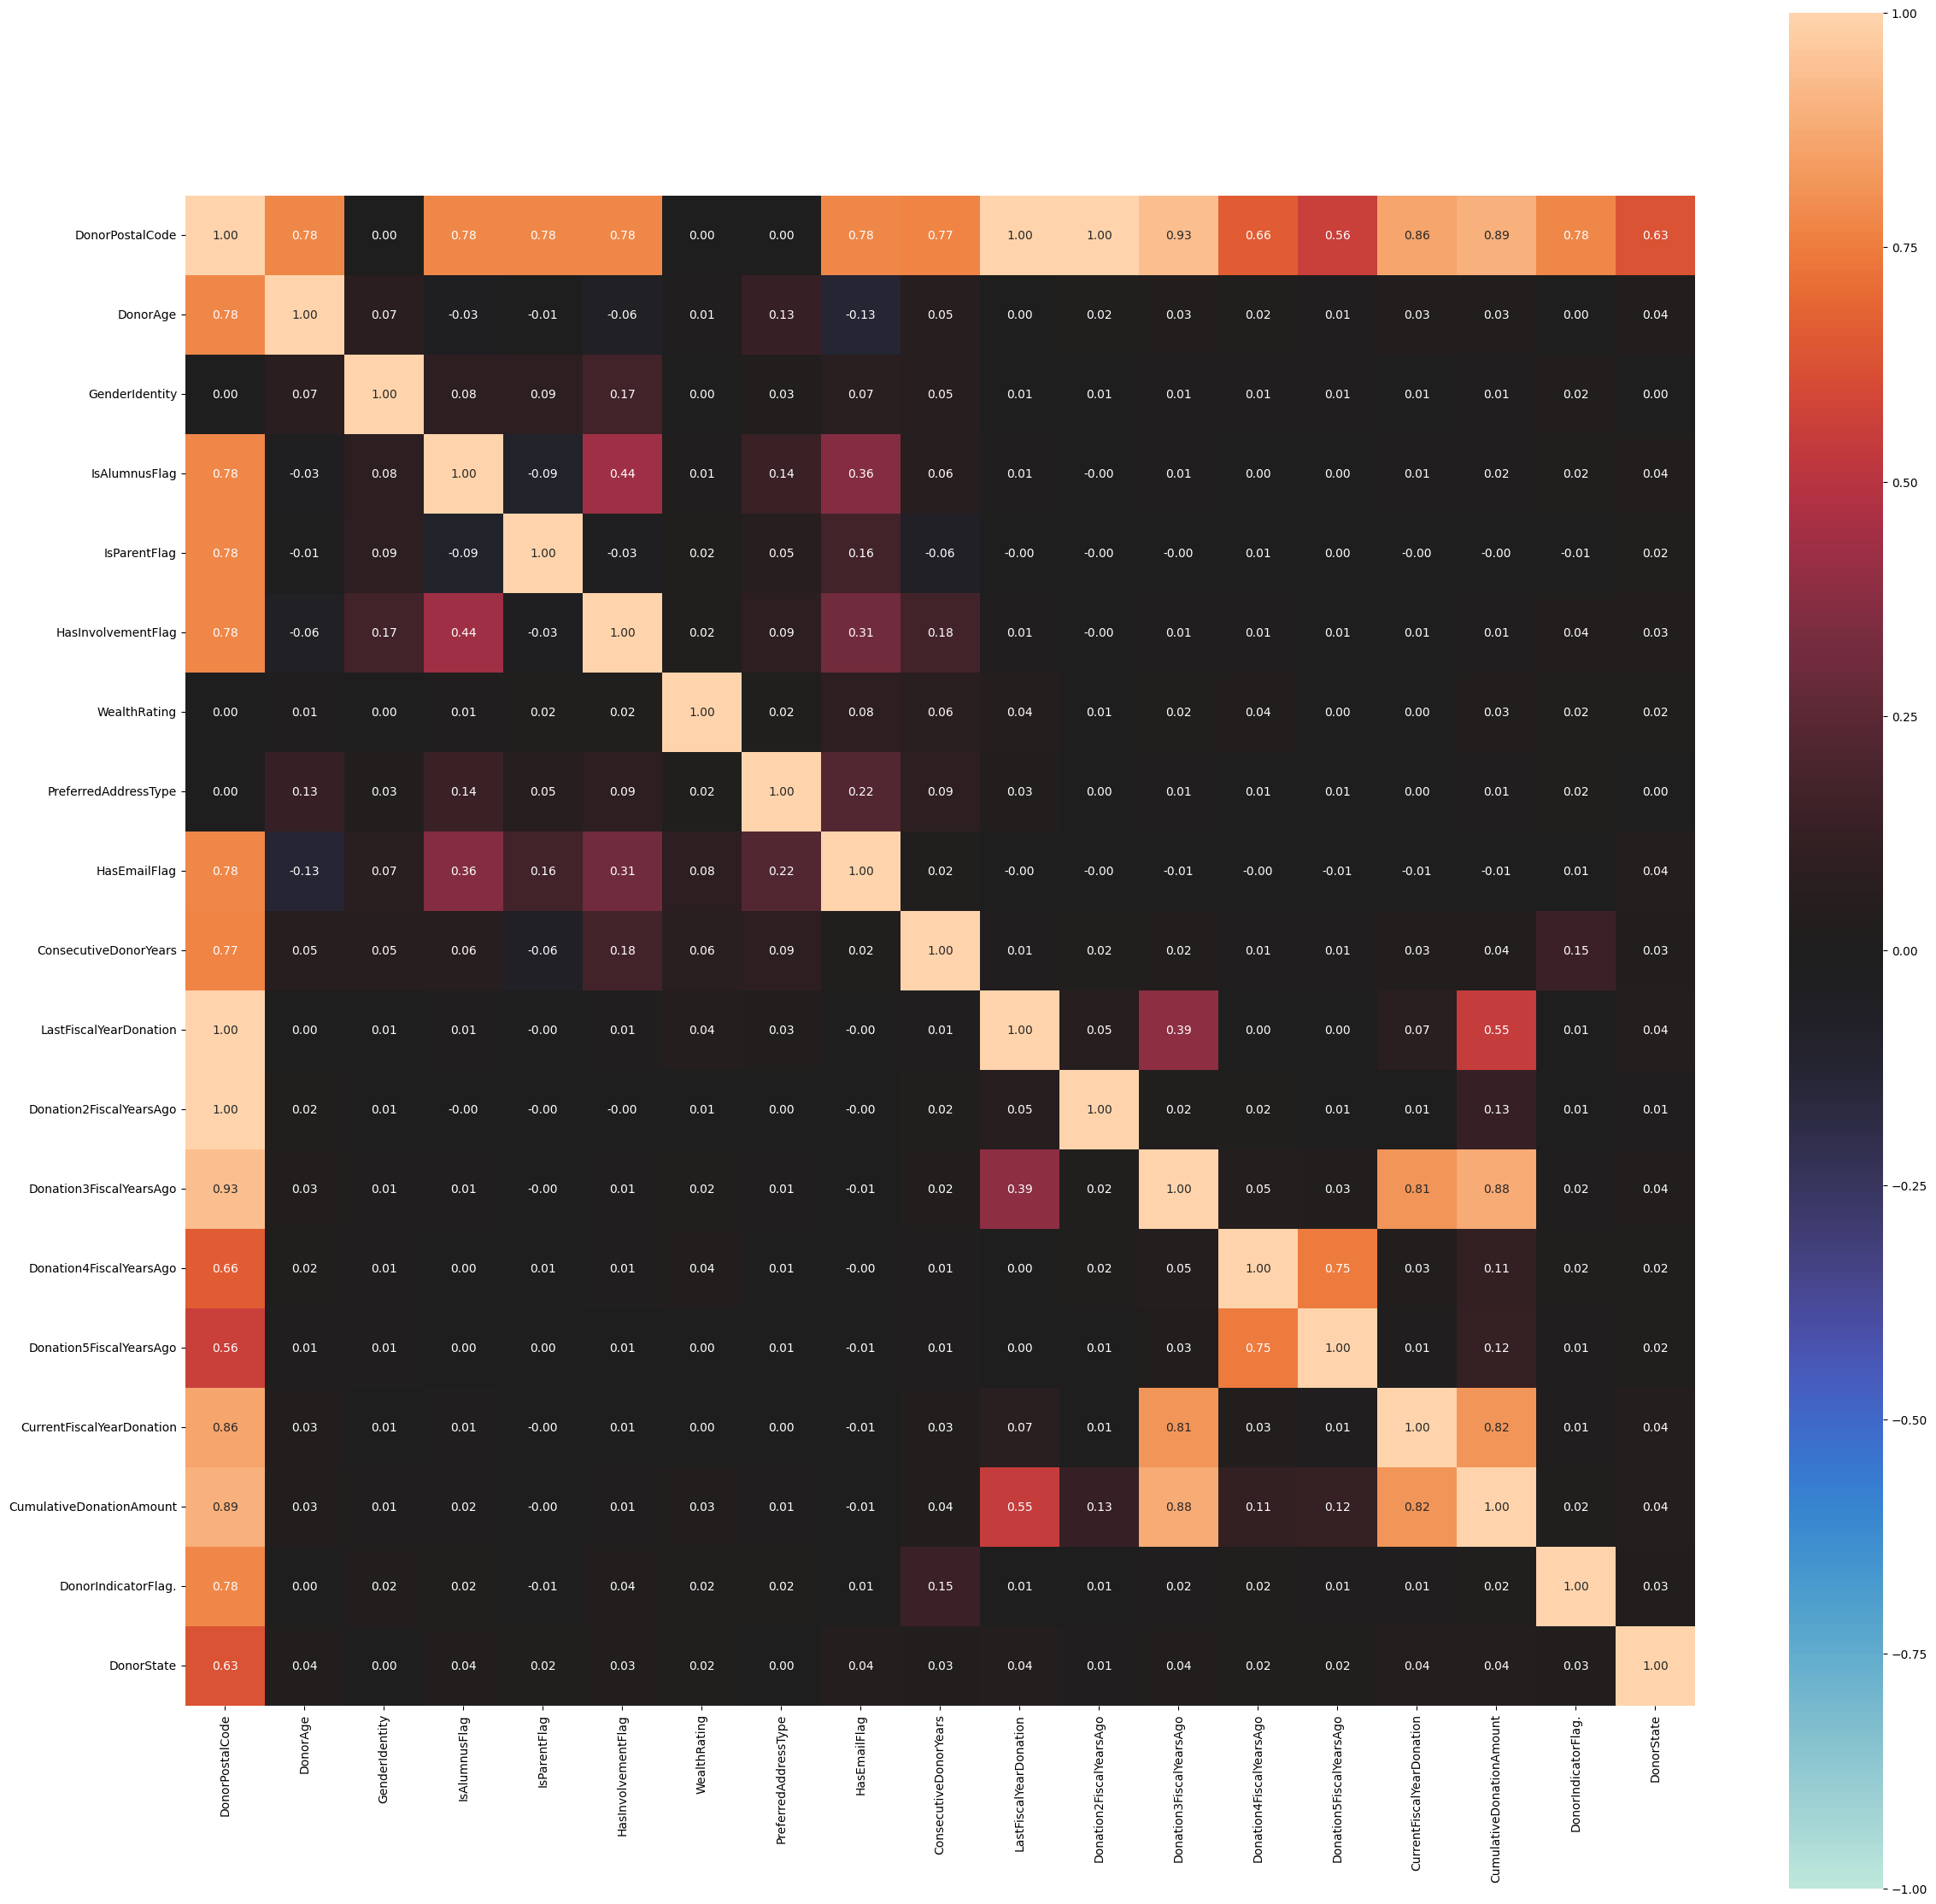

In [ ]:
#code snippet 13
#import dython for correlacion analisys
import dython
from dython.nominal import associations
corr = associations(df)

#AI/ML Model Testing Process

In [ ]:
#code snippet 14
#installing pycaret to AI/ML model test
!pip install pycaret


In [ ]:
#code snippet 15
#setting up the classification pycaret ML model
from pycaret.classification import *


In [ ]:
#code snippet 16
#displaying data dtypes
df.dtypes

,0
DonorPostalCode,object
DonorAge,int64
GenderIdentity,object
IsAlumnusFlag,int64
IsParentFlag,int64
HasInvolvementFlag,int64
WealthRating,object
PreferredAddressType,object
HasEmailFlag,int64
ConsecutiveDonorYears,int64


In [ ]:
# Code snippet 17
# Setting the target variable
y = 'DonorIndicatorFlag.'


In [ ]:
# Code snippet 18
# Setting the ignored variables(noise variables, redundant variables,  variables that are missing more than 20% data etc)
ignored_cols = ['CumulativeDonationAmount'
     ]

In [ ]:
# Code snippet 19
# Setting the numerical variables
num_cols = [ 'HasInvolvementFlag','DonorAge', 'IsAlumnusFlag',
       'IsParentFlag', 'HasEmailFlag',
       'LastFiscalYearDonation', 'Donation2FiscalYearsAgo',
       'Donation3FiscalYearsAgo', 'Donation4FiscalYearsAgo',
       'Donation5FiscalYearsAgo', 'CurrentFiscalYearDonation', 'ConsecutiveDonorYears'
       ]

In [ ]:
# Code snippet 20
# Setting the categorical variables
cat_cols = [  'GenderIdentity', 'WealthRating','DonorPostalCode',
       'PreferredAddressType','DonorState']

In [ ]:
# Code snippet 21
# Setting up/configuring the pycaret setup for Classification ML modeling
classification_setup = setup(df,
                        target = y,
                        ignore_features = ignored_cols,
                        categorical_features = cat_cols,
                        numeric_features = num_cols, train_size = 0.7)

,Description,Value
0,Session id,3457
1,Target,DonorIndicatorFlag.
2,Target type,Binary
3,Original data shape,"(34508, 19)"
4,Transformed data shape,"(34508, 34)"
5,Transformed train set shape,"(24155, 34)"
6,Transformed test set shape,"(10353, 34)"
7,Ignore features,1
8,Numeric features,12
9,Categorical features,5


#Compare ML models

In [ ]:
#code snippet 22
# Running pycaret to invoke ML algorithms
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.6827,0.7565,0.4892,0.9999,0.6568,0.4205,0.5159,0.3190
rf,Random Forest Classifier,0.6578,0.6902,0.7269,0.7237,0.7251,0.2717,0.2720,1.7970
ada,Ada Boost Classifier,0.6543,0.6834,0.6171,0.7910,0.6883,0.3091,0.3271,1.1160
gbc,Gradient Boosting Classifier,0.6537,0.6721,0.6091,0.8098,0.6832,0.3063,0.3353,2.3130
knn,K Neighbors Classifier,0.6460,0.7064,0.7295,0.7091,0.7190,0.2410,0.2413,1.0510
xgboost,Extreme Gradient Boosting,0.6455,0.6625,0.6343,0.7566,0.6896,0.2833,0.2899,0.5750
svm,SVM - Linear Kernel,0.6434,0.7527,0.8331,0.6925,0.7404,0.1642,0.1885,0.7520
lr,Logistic Regression,0.6429,0.7511,0.8687,0.6620,0.7513,0.1571,0.1768,3.3160
dt,Decision Tree Classifier,0.6400,0.6409,0.6570,0.7370,0.6938,0.2596,0.2632,0.4780
lightgbm,Light Gradient Boosting Machine,0.6389,0.6459,0.6277,0.7528,0.6834,0.2699,0.2774,3.0190


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

#Best Model

In [ ]:
#code snippet 23
#savin the best model to test
best_model = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6792,0.7585,0.4837,1.0000,0.6520,0.4151,0.5117
1,0.6788,0.7555,0.4830,1.0000,0.6514,0.4144,0.5112
2,0.6887,0.7665,0.4990,1.0000,0.6658,0.4300,0.5234
3,0.6838,0.7536,0.4907,1.0000,0.6583,0.4221,0.5172
4,0.6796,0.7511,0.4840,1.0000,0.6523,0.4156,0.5122
5,0.6832,0.7475,0.4900,1.0000,0.6577,0.4213,0.5166
6,0.6870,0.7536,0.4960,1.0000,0.6631,0.4272,0.5212
7,0.6625,0.7381,0.4573,0.9985,0.6273,0.3889,0.4906
8,0.6936,0.7709,0.5067,1.0000,0.6726,0.4376,0.5293


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Code snippet 24
# Predicting 'eBook Subscriber Flag' on a dataset
predictions = predict_model(best_model, df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.6837,0.9163,0.4907,0.9999,0.6584,0.4220,0.5171


In [ ]:
# Code snippet 25
# Exporting predictions to a csv file
predictions.to_csv('qda Donor predictions.csv')

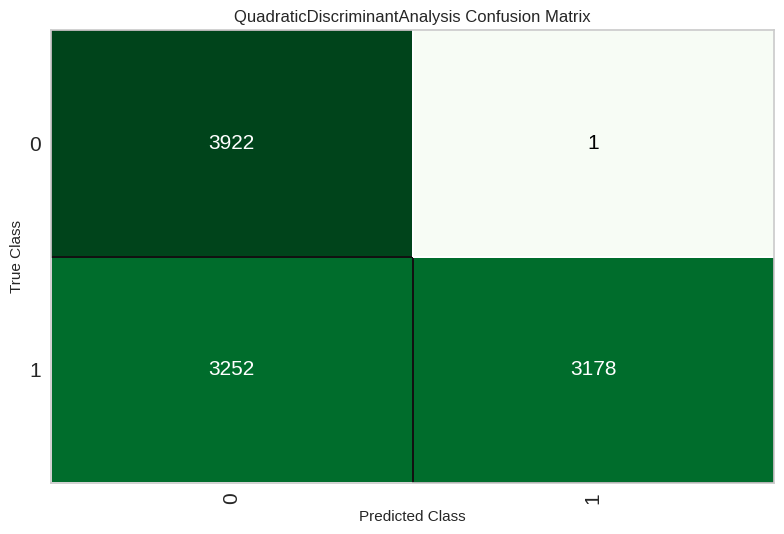

In [ ]:
# Code Snippet 26
# Plot the confusion matrix for the Best Model
plot_model(best_model, plot="confusion_matrix")


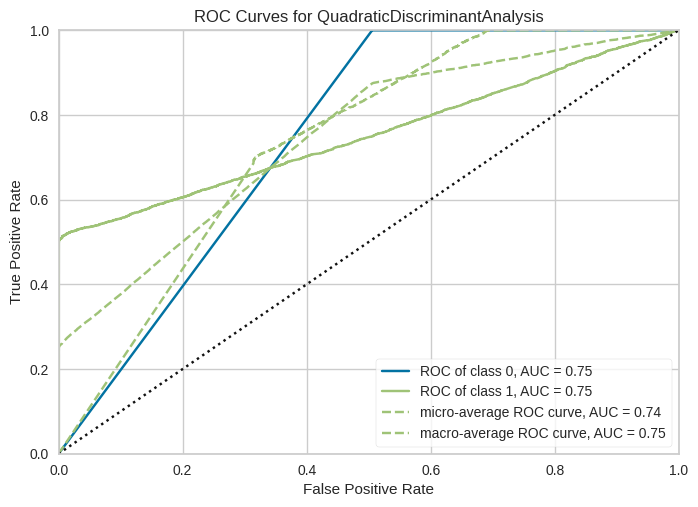

In [ ]:
# Code Snippet 27
# Plot the ROC curve (AUC) for the Best Model
plot_model(best_model, plot="auc")


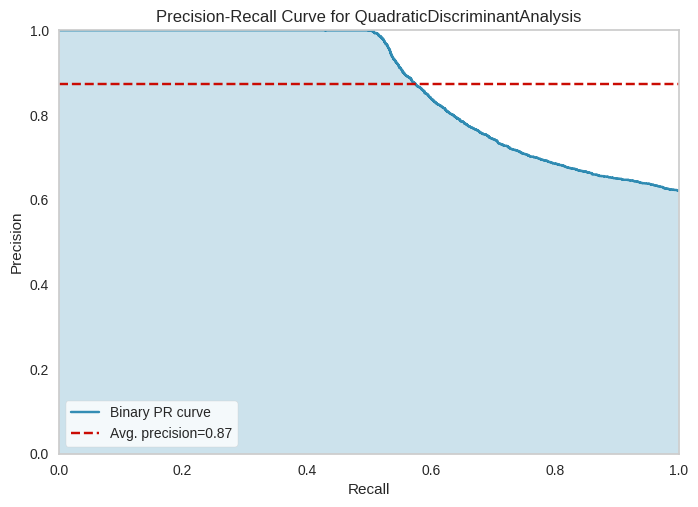

In [ ]:
# Code Snippet 29
# Plot the Precision-Recall curve
plot_model(best_model, plot="pr")



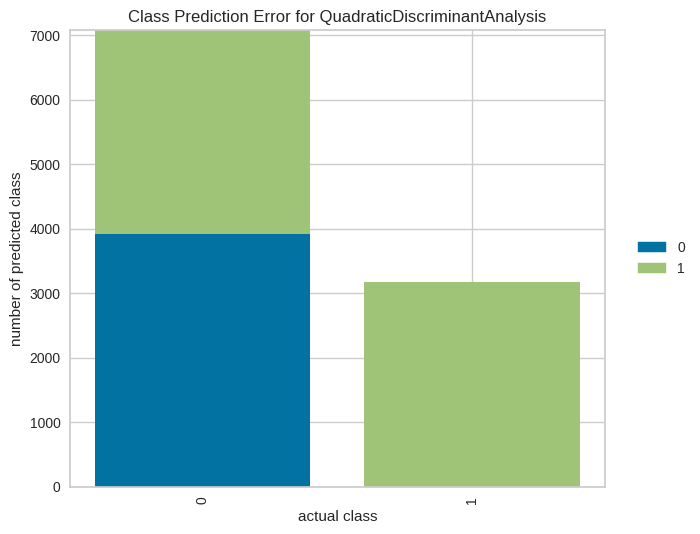

In [ ]:
# Code Snippet 30
# Plot the class prediction error
plot_model(best_model, plot="error")


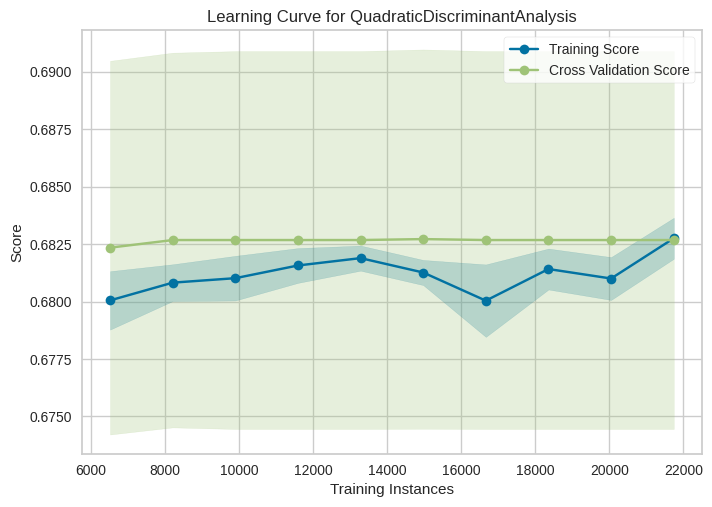

In [ ]:
# Code Snippet 31
# Plot the learning curve
plot_model(best_model, plot="learning")


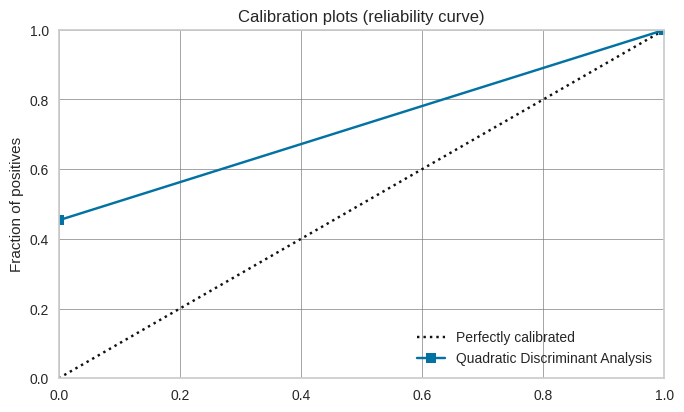

In [ ]:
# Code Snippet 32
# Plot the calibration curve
plot_model(best_model, plot="calibration")
